In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = None
with open('filtered_endomondoHR.json') as f:
    for line in f:
        data = eval(line)

In [3]:
df = pd.DataFrame(data)
df['time'] = pd.to_datetime(df['time'], unit='s')
df = df.sort_values(by=['time'])
df = df[df.gender != 'unknown']

In [10]:
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month

In [11]:
def find_stats(gy_df):
    gy_df = df[['year', 'gender']].groupby(['year', 'gender']).size().reset_index()
    gy_df.columns = ["year", "gender", "count"]
    display(gy_df)
    plt.figure(figsize=(10, 7))
    sns.barplot(x='year', hue='gender', y='count', data=gy_df)
    gy = gy_df.groupby(['year', 'gender']).agg({'count': 'sum'})
    gy_prop = gy.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
    plt.figure(figsize=(10, 7))
    gy_prop.columns = ['year', 'gender', 'percent']
    sns.barplot(x='year', hue='gender', y='percent', data=gy_prop)

,year,gender,count
0,2006,male,1
1,2007,male,11
2,2008,male,77
3,2009,female,1
4,2009,male,188
5,2010,female,22
6,2010,male,539
7,2011,female,171
8,2011,male,2970
9,2012,female,866


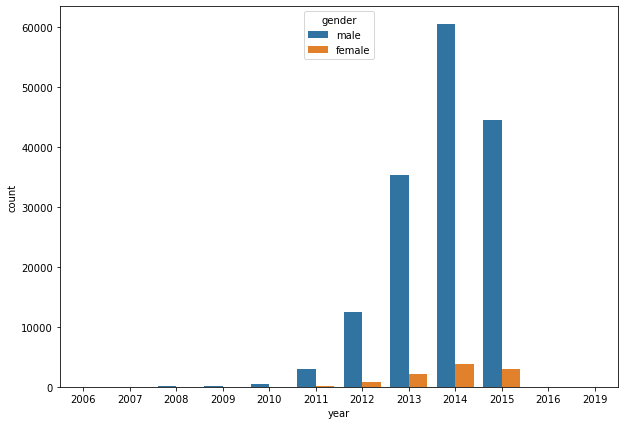

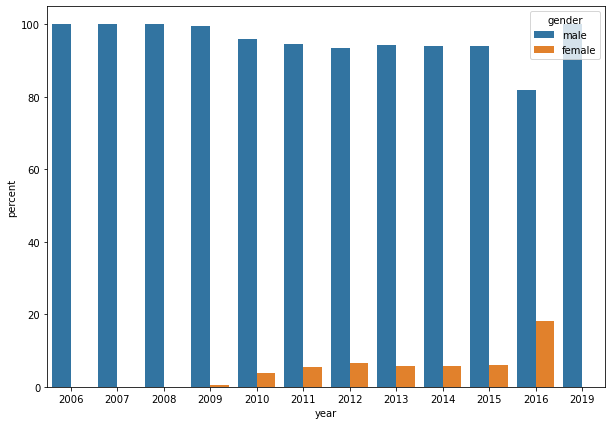

In [12]:
find_stats(df)

In [7]:
df.sport.unique()

array(['run', 'bike', 'mountain bike', 'indoor cycling', 'aerobics',
       'kayaking', 'core stability training', 'bike (transport)', 'walk',
       'hiking', 'orienteering', 'skate', 'circuit training',
       'fitness walking', 'cross-country skiing', 'weight training',
       'gymnastics', 'downhill skiing', 'rowing', 'tennis',
       'horseback riding', 'roller skiing', 'swimming', 'badminton',
       'elliptical', 'snowboarding', 'snowshoeing', 'climbing', 'pilates',
       'golf', 'soccer', 'treadmill running', 'stair climing',
       'basketball', 'yoga', 'martial arts', 'table tennis', 'rugby',
       'kite surfing', 'squash', 'windsurfing', 'sailing',
       'treadmill walking'], dtype=object)